# DATASET DE BankMarketing

## Étape 1 : Importer les packages

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [91]:
# importation de WARNING
import warnings
warnings.filterwarnings("ignore")

## Étape 2 : Charger les données

In [92]:
data = pd.read_csv("../BISIMWA M DESTIN/Book1 (1).csv")

In [93]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Étape 3 : Analyse de données

In [94]:
# Détail du dataset(598 lignes et 13 colones)
data.shape

(45211, 17)

In [95]:
# Les noms des colones dont dispose le dataset
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [96]:
# ça donne les informations générales sur le dataset et détermine le type de données pour chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [97]:
# Ici ça determine combien des clients ont des maisons à mettre en gage
# Donc la f(x) < .VALUE_COUNTS()> ne fait que compter les lignes de la colone cible
data['housing'].value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [98]:
# Ici ça determine combien des clients ont des maisons à mettre en gage
# Donc la f(x) < .VALUE_COUNTS()> ne fait que compter les lignes de la colone cible
data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [99]:
# Pour identifier les colonnes ayant des valeurs vides et cobien des vides pour chaque colonne
# Dans notre dataset y pas des colonnes possedant des valeurs vides
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

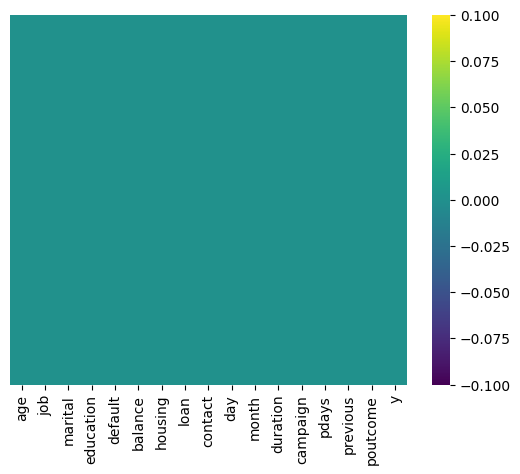

In [100]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<Axes: >

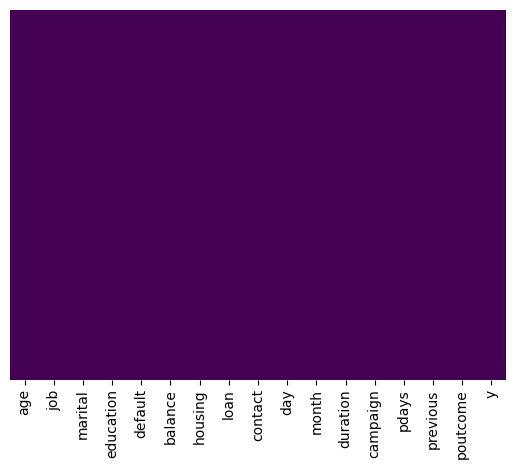

In [101]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [102]:
#sns.heatmap(data.corr(), annot=False)

## Étape 4 : Prétraitement des donnees

In [103]:
colonne_critere = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 
       'previous', 'poutcome', 'y']]

In [104]:
colonne_critere

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,unknown,no


In [105]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [106]:
# Créer un DataFrame
#df = pd.DataFrame(data)

# Mapper les valeurs de la colonne job directement
#colonne_critere['job'] = colonne_critere['job'].apply(lambda x: 0 if x in ['unknown', 'retired','blue-collar'] else 1)
#colonne_critere['housing'] = colonne_critere['housing'].apply(lambda x: 0 if x in ['yes', 'no'] else 1)
#colonne_critere['loan'] = colonne_critere['loan'].apply(lambda x: 0 if x in ['yes', 'no'] else 1)
#colonne_critere['y'] = colonne_critere['y'].apply(lambda x: 0 if x in ['yes', 'no'] else 1)
                                      
# Afficher le DataFrame mis à jour
#colonne_critere
                                             # [ CE      CODE       PASSE  AUSSI    BIEN ]

In [107]:
colonne_critere = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 
       'previous', 'poutcome', 'y']]

In [108]:
colonne_critere

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,unknown,no


In [109]:
col_encoded = LabelEncoder()
list_object = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 
       'previous', 'poutcome', 'y']
for encoded in list_object:
    colonne_critere[encoded] = col_encoded.fit_transform(colonne_critere[encoded])

In [110]:
colonne_critere

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,3,0


In [111]:
# On crée un dictionnaire pour permettre à MAPPER la colonne Property_Area
# NB: Ns créons un dictionnaire pcq cette colonnes a 3 élements
#     or c'est impossible de faire en binaire, d'où il faut créer un dictionnaire et attribuer de valeurs numériques pour chaque élement
#dict_map={
 #   'management':1,
  #  'entrepreneur':1,
   # 'blue-collar':1,
    #'unknown':0,
  #  'retired':0,
   #  'admin':1,
    # 'services':1,
  #  'self-employed':1,
   #  'unemployed':0,
   #  'housemaid':1,
    #'student':0,
    #'technician':1,
    
#}

In [112]:
# Appliquons alors le mapping sur le dataset
# La colonne Property_Area a changée ses données en 0 et 1 avec le MAPPING automatique
#colonne_critere[['job','housing','loan']] = colonne_critere[['job','housing','loan']].map(dict_map)
#colonne_critere

In [113]:
# Ici c pour mapper les données catégorielles en données numeriques
# Par exemple MALE=1 et FEMALE=2
#             MARRIED=1 ET NO MARRIED=0
#data['job']=np.where(data['job']==1,0)
#data['housing']=np.where(data['housing']=='Yes',1,0)
#data['loan']=np.where(data['loan']=='yes',1,0)


In [114]:
#sns.heatmap(colonne_critere.corr(), annot=True)  CA PASSE AUSSI BIEN SI ON UTILISE CELUI DE [665]

<Axes: >

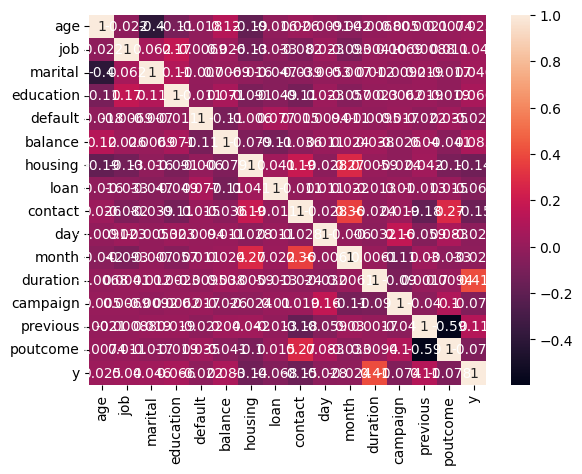

In [115]:
# LA MATRICE DE CORRELATION
sns.heatmap(colonne_critere.corr(), annot=True)

##  Étape 5 : Diviser les donnees : Train et Test

In [116]:
from sklearn.model_selection import train_test_split
#X = data.drop(['Loan_Status'], axis = 1)
X = sub_data.iloc[:,:-1]
y = sub_data.iloc[:,-1]
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)
print("X_train:", X_train.shape )
print("X_test:", X_test.shape )
print("Y_train:", y_train.shape )
print("Y_test:", y_test.shape )

X_train: (31647, 15)
X_test: (13564, 15)
Y_train: (31647,)
Y_test: (13564,)


##  Étape 6 : Selectionner au moins 4 Algorithms de Machine Learning

## Ièr Modèle  : LogisticRegression

In [117]:
from sklearn.linear_model import LogisticRegression
logRegress_model = LogisticRegression()

### a. Entrainement du modèle

In [118]:
logRegress_model.fit(X_train, y_train)

LogisticRegression()

### b. Prédiction

In [119]:
y_predict_lr = logRegress_model.predict(X_test)
y_predict_lr

array([0, 0, 0, ..., 0, 0, 0], shape=(13564,))

### c. Evaluation du modèle

In [120]:
print("Accuracy de la Régression logistic:", 100 * accuracy_score(y_test,y_predict_lr))
print("MSE de la Regression logistic:", 100 * mean_squared_error(y_test,y_predict_lr))

Accuracy de la Régression logistic: 88.64641698613978
MSE de la Regression logistic: 11.353583013860218


In [121]:
#print(confusion_matrix(y_test,y_predict_lr))
#confus_matrix = ConfusionMatrixDisplay.from_estimator(bank_model,X_test, y_test, display_labels = ['0', '1'])
                          # CA F(X)NNE TRES BIEN

In [122]:
#print(confusion_matrix(y_test,y_predict_lr))
#confus_matrix = ConfusionMatrixDisplay.from_estimator(bank_model,X_train, y_train, display_labels = ['0', '1'])

### d. Détrmination de précision,F1_score et Recall du Modèle LogisticRegression

In [123]:
print("Précision_score de la Régression logistic:", 100 * precision_score(y_test,y_predict_lr))
print("F1_score de la Regression logistic:", 100 * f1_score(y_test,y_predict_lr))
print("Recall de la Regression logistic:", 100 * recall_score(y_test,y_predict_lr))

#print("MSE de la Regression logistic:", 100 * mean_squared_error(y_test,y_predict_lr))


Précision_score de la Régression logistic: 50.94664371772806
F1_score de la Regression logistic: 27.76735459662289
Recall de la Regression logistic: 19.084461637653128


## IIème Modèle  : K-NN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

# Variable portant le modèle
Knn_model = KNeighborsClassifier(n_neighbors=3)

### a. Entrainement du modèle

In [125]:
Knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### b. Prédiction

In [126]:
y_predict_knn = Knn_model.predict(X_test)
y_predict_knn

array([0, 0, 0, ..., 0, 0, 0], shape=(13564,))

### c. Evaluation

In [127]:
print("Accuracy score de KNN model:", 100 * accuracy_score(y_test, y_predict_knn))
print("MSE du KNN model:", 100 * mean_squared_error(y_test,y_predict_knn))

Accuracy score de KNN model: 87.14243585962843
MSE du KNN model: 12.857564140371572


### d. Détrmination de précision,F1_score et Recall du Modèle K-NN

In [128]:
print("Précision_score de K-NN:", 100 * precision_score(y_test,y_predict_knn))
print("F1_score de K-NN:", 100 * f1_score(y_test,y_predict_knn))
print("Recall de K-NN:", 100 * recall_score(y_test,y_predict_knn))

#print("MSE de K-NN:", 100 * mean_squared_error(y_test,y_predict_knn))


Précision_score de K-NN: 38.99657924743444
F1_score de K-NN: 28.171334431630974
Recall de K-NN: 22.05029013539652


## IIIème Modèle  : RandomForest

In [129]:
from sklearn.ensemble import RandomForestClassifier

# Création de la variable portant le modèle
randomF_model = RandomForestClassifier(n_estimators = 3, criterion='entropy', random_state = 3)

### a. Entrainement du modèle

In [130]:
randomF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3, random_state=3)

### b. Prédiction

In [131]:
y_predict_randomF_model = randomF_model.predict(X_test)
y_predict_randomF_model

array([0, 0, 0, ..., 0, 0, 1], shape=(13564,))

### c. Evaluation

In [132]:
print("Accuracy score de RandomForest model:", 100 * accuracy_score(y_test, y_predict_randomF_model))
print("MSE du RandomForest model:", 100 * mean_squared_error(y_test,y_predict_randomF_model))

Accuracy score de RandomForest model: 88.58743733411973
MSE du RandomForest model: 11.412562665880271


### d. Détrmination de précision,F1_score et Recall du Modèle RandomForest

In [133]:
print("Précision_score de RandomForest:", 100 * precision_score(y_test,y_predict_randomF_model))
print("F1_score de RandomForest:", 100 * f1_score(y_test,y_predict_randomF_model))
print("Recall de RandomForest:", 100 * recall_score(y_test,y_predict_randomF_model))

#print("MSE de RandomForest:", 100 * mean_squared_error(y_test,y_predict_randomF_model))


Précision_score de RandomForest: 50.12048192771085
F1_score de RandomForest: 44.63519313304721
Recall de RandomForest: 40.232108317214696


## IVème Modèle  : SVC

In [134]:
from sklearn.svm import SVC

In [135]:
# Création de la variable portant le modèle
svc_model = SVC()

### a. Entrainement du modèle

In [136]:
svc_model.fit(X_train, y_train)

SVC()

### b. Prédiction

In [137]:
y_predict_svc_model = svc_model.predict(X_test)
y_predict_svc_model

array([0, 0, 0, ..., 0, 0, 0], shape=(13564,))

### c. Evaluation

In [138]:
print("Accuracy score de svc_model:", 100 * accuracy_score(y_test, y_predict_svc_model))
print("MSE du svc_model:", 100 * mean_squared_error(y_test,y_predict_svc_model))

Accuracy score de svc_model: 88.80123857269243
MSE du svc_model: 11.198761427307579


### d. Détrmination de précision,F1_score et Recall du Modèle SVC

In [139]:
print("Précision_score de svc_model:", 100 * precision_score(y_test,y_predict_svc_model))
print("F1_score de svc_model:", 100 * f1_score(y_test,y_predict_svc_model))
print("Recall de svc_model:", 100 * recall_score(y_test,y_predict_svc_model))

#print("MSE de svc_model:", 100 * mean_squared_error(y_test,y_predict_svc_model))


Précision_score de svc_model: 61.111111111111114
F1_score de svc_model: 10.383480825958703
Recall de svc_model: 5.673758865248227


##  Étape 7 : Evaluer les modèles

##  Étape 8 : Faire une simple prediction